# DS-210: Programming for Data Science


# Lecture 11: Overfitting and underfitting. Bias and variance.


## Attendance: https://piazza.com/class/lrat4tm83gbnz/

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from decision_area import draw_decision_area

## Noisy classification

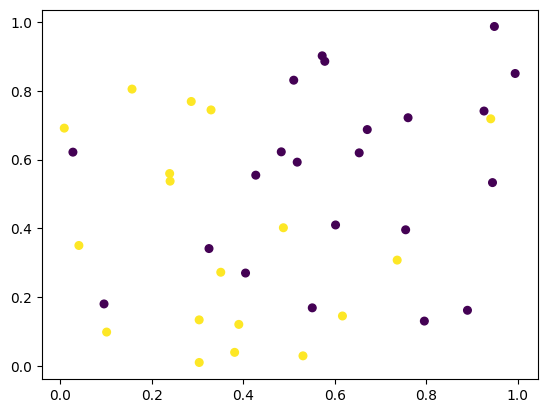

In [10]:
DIMENSIONS = 2

def noise(x, flip_prob=.25):
    if np.random.uniform() < flip_prob:
        return not x
    return x

f1 = lambda x : x[0] <= 0.5
f2 = lambda x : noise(x[0] <= 0.5)
 
SAMPLES = 40
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [f2(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [f2(x) for x in X2]

In [13]:
clf = DecisionTreeClassifier(max_leaf_nodes=2)
clf.fit(X,Y)
print(tree.export_text(clf))

|--- feature_0 <= 0.40
|   |--- class: True
|--- feature_0 >  0.40
|   |--- class: False



0.8
0.691


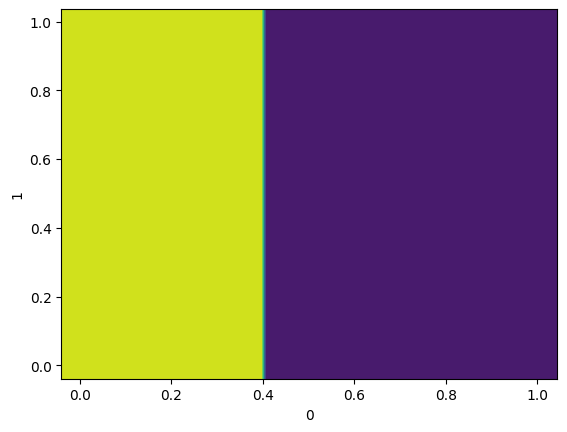

In [14]:
draw_decision_area(clf,X,0,1)
print(clf.score(X,Y))
print(clf.score(X2,Y2))

## Noisy classification

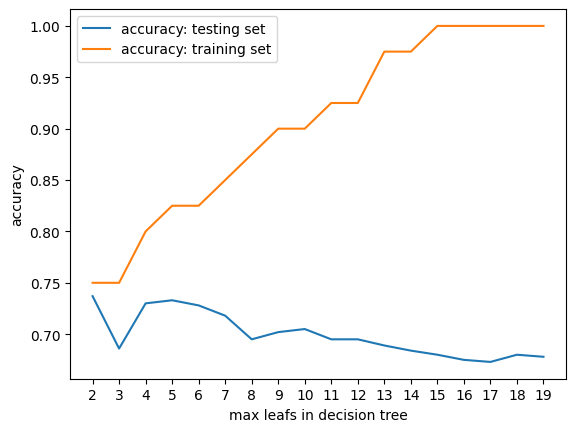

In [6]:
import math

xs,ys,zs = [],[],[]

for leafs in range(2,20):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys);
plt.plot(xs,zs);
xlabels = range(math.floor(min(xs)), math.ceil(max(xs)+1))
plt.xticks(xlabels)
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("max leafs in decision tree")
plt.ylabel("accuracy");

## High–dimensional example

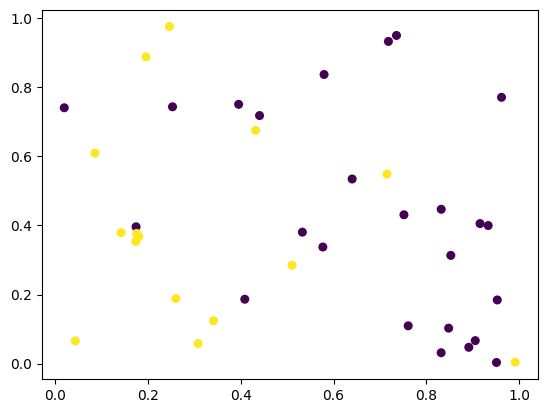

In [15]:
DIMENSIONS = 50
 
SAMPLES = 40
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [f2(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y);

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [f2(x) for x in X2]

In [16]:
dimension = 50
clf=DecisionTreeClassifier(max_leaf_nodes=2)
clf.fit(X[:,:dimension],Y)
print(tree.export_text(clf))
print(clf.score(X[:,:dimension],Y))
print(clf.score(X2[:,:dimension],Y2))

|--- feature_0 <= 0.37
|   |--- class: True
|--- feature_0 >  0.37
|   |--- class: False

0.825
0.668


## High–dimensional example

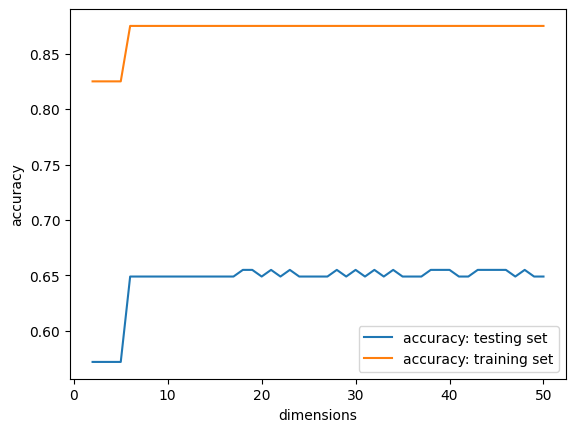

In [20]:
xs,ys,zs = [],[],[]

LEAFS = 3
for d in range(2,DIMENSIONS+1):
    clf = DecisionTreeClassifier(
        max_leaf_nodes=LEAFS)
    clf.fit(X[:,:d],Y)
    
    xs.append(d)
    ys.append(clf.score(X2[:,:d],Y2))
    zs.append(clf.score(X[:,:d],Y))

plt.plot(xs,ys)
plt.plot(xs,zs)
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("dimensions")
plt.ylabel("accuracy");

## A more complicated function

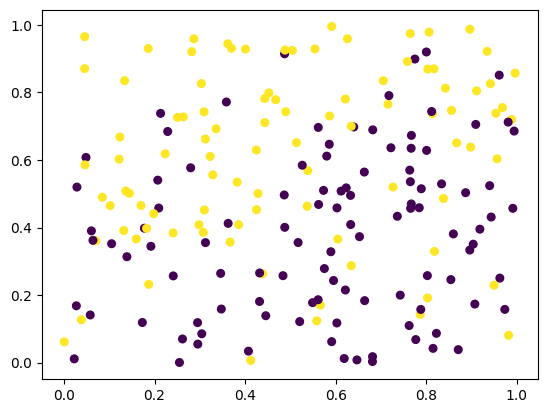

In [21]:
DIMENSIONS = 2

def f(x):
    if x[0] < 0.5:
        return x[1] > 0.3 
    else:
        return x[1] > 0.7

g = lambda x : noise(f(x))
    
SAMPLES = 200
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [g(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 1000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [g(x) for x in X2]

In [22]:
clf = DecisionTreeClassifier(max_leaf_nodes=20)
clf.fit(X,Y)
#print(tree.export_text(clf))
print(clf.score(X,Y))
print(clf.score(X2,Y2))

0.87
0.683


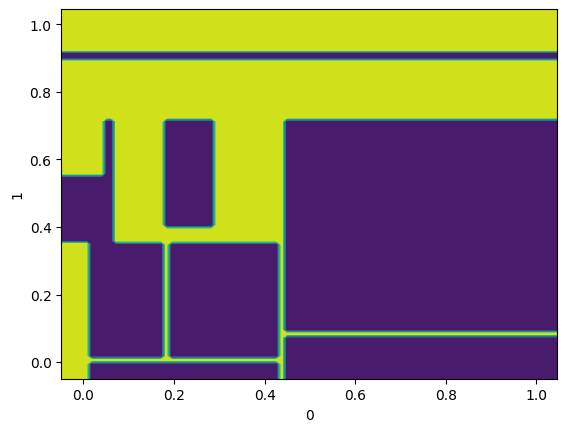

In [23]:
draw_decision_area(clf,X,0,1)

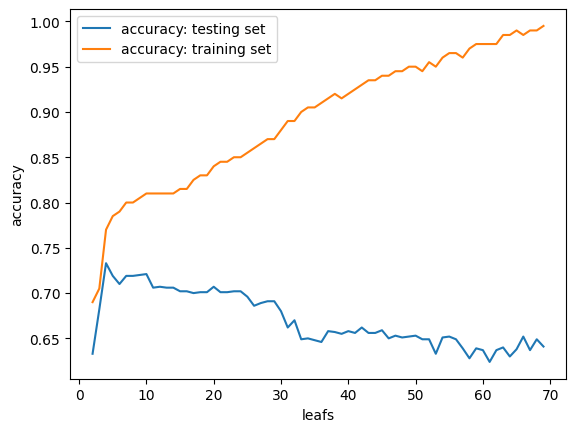

In [27]:
xs,ys,zs = [],[],[]

for leafs in range(2,70):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys);
plt.plot(xs,zs);
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("leafs")
plt.ylabel("accuracy");

## Another example

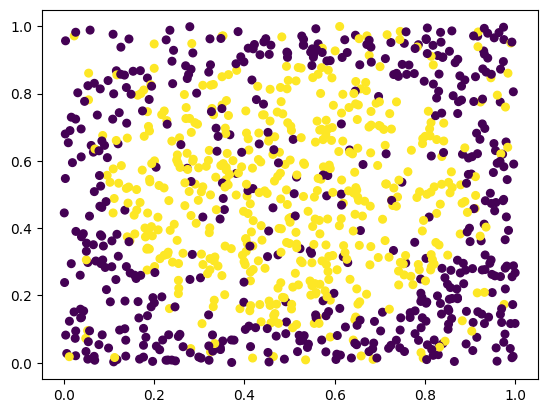

In [24]:
DIMENSIONS = 2

f = lambda x : (x[0]-0.5)**2 + (x[1]-0.5)**2 < 0.16

g = lambda x : noise(f(x),.15)
    
SAMPLES = 1000
X = np.random.uniform(size=(SAMPLES,DIMENSIONS))
Y = [g(x) for x in X]
plt.scatter(X[:,0],X[:,1],30,c = Y)

TEST_SAMPLES = 10000
X2 = np.random.uniform(size=(TEST_SAMPLES,DIMENSIONS))
Y2 = [g(x) for x in X2]

In [25]:
clf = DecisionTreeClassifier(max_leaf_nodes=64)
clf.fit(X,Y)
print(tree.export_text(clf))
print(clf.score(X,Y))
print(clf.score(X2,Y2))

|--- feature_1 <= 0.15
|   |--- feature_0 <= 0.28
|   |   |--- class: False
|   |--- feature_0 >  0.28
|   |   |--- feature_0 <= 0.69
|   |   |   |--- feature_1 <= 0.11
|   |   |   |   |--- feature_0 <= 0.29
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_0 >  0.29
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- feature_0 <= 0.65
|   |   |   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |   |   |--- class: False
|   |   |   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |   |--- feature_0 >  0.65
|   |   |   |   |   |   |   |--- class: True
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- class: False
|   |   |   |--- feature_1 >  0.11
|   |   |   |   |--- feature_1 <= 0.12
|   |   |   |   |   |--- class: True
|   |   |   |   |--- feature_1 >  0.12
|   |   |   |   |   |--- feature_0 <= 0.48
|   |   |   |   |   |   |--- feature_0 <= 0.38
|   |   

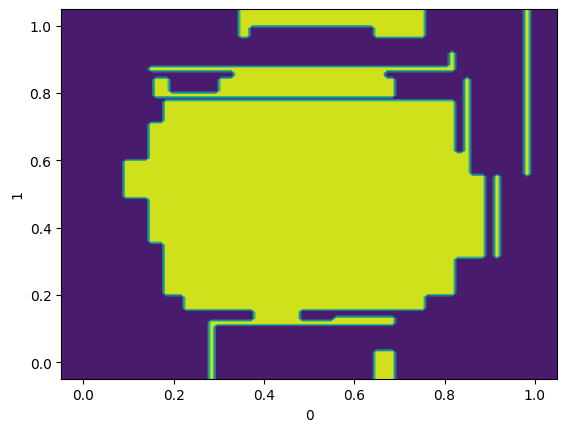

In [26]:
draw_decision_area(clf,X,0,1)

## Another example

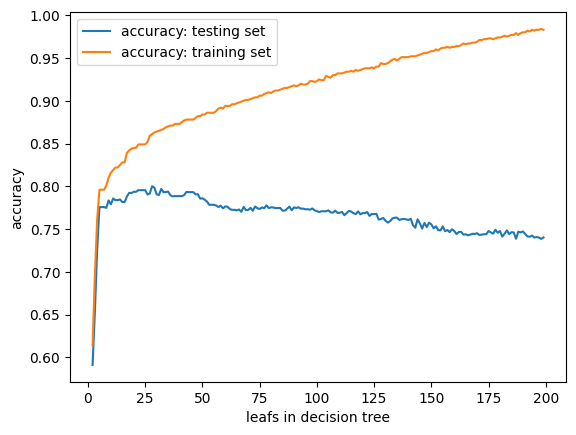

In [35]:
xs,ys,zs = [],[],[]

for leafs in range(2,200):
    clf = DecisionTreeClassifier(max_leaf_nodes=leafs)
    clf.fit(X,Y)

    xs.append(leafs)
    ys.append(clf.score(X2,Y2))
    zs.append(clf.score(X,Y))
    
plt.plot(xs,ys)
plt.plot(xs,zs)
plt.legend(["accuracy: testing set","accuracy: training set"])
plt.xlabel("leafs in decision tree")
plt.ylabel("accuracy");

## Underfitting

* Model not expressive enough to capture the problem
* Or a solution found does not match the problem

Possible solutions:
* Try harder to find a better solution
* Add more parameters
* Try a different model that captures the solution

## Overfitting

* Predictions adjusted too well to training data
* Error on test data $\ggg$ error on training data

**Possible solutions:**
* Don't optimize the model on the training data too much
* Remove features that are too noisy
* Add more training data
* Reduce model complexity

## Bias and variance

$$\mbox{Total learning error} = \mbox{Bias} + \mbox{Variance} + \mbox{noise}$$

### Bias:  The simplifying assumptions made by the model to make the target function easier to approximate.  Mathematically it is the difference of the average value of predictions from the true function:            $$E[\hat{f}(x) - f(x)]$$

### Variance: The amount that the output of the model changes given different training data.  Mathematically it is the mean of the delta of the squared deviation of the prediction function from its expected value:  $$E[(\hat{f}(x) - E[\hat{f}(x)])^2]$$

**Bias:** error due to model unable to match the complexity of the problem

**Variance:** how much the prediction will vary in response to data points

**Overfitting:** high variance, low bias

**Underfitting:** high bias, low variance

**Important in practice:**

* detecting the source of problems: variance vs. bias, overfitting vs. underfitting

* navigating the trade-off and finding the sweet spot  

## Some examples


 |<font size="5"> Algorithm </font> |<font size="5"> Bias|<font size="5"> Variance|
 |:-:|:-:|:-:|
 |<font size="5">Linear Regression|<font size="5">High|<font size="5">Low|
 |<font size="5">Decision Tree|<font size="5">Low|<font size="5">High|
 |<font size="5">Random Forest|<font size="5">Low|<font size="5">High (less than tree)|

